In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!unzip gdrive/"My Drive"/Datasets.zip

Archive:  gdrive/My Drive/Datasets.zip
   creating: Datasets/Test/
   creating: Datasets/Test/audi/
  inflating: Datasets/Test/audi/21.jpg  
  inflating: Datasets/Test/audi/22.jpg  
  inflating: Datasets/Test/audi/23.jpg  
  inflating: Datasets/Test/audi/24.jpg  
  inflating: Datasets/Test/audi/25.jpg  
  inflating: Datasets/Test/audi/26.jpg  
  inflating: Datasets/Test/audi/27.jpg  
 extracting: Datasets/Test/audi/28.jpg  
  inflating: Datasets/Test/audi/29.jpg  
   creating: Datasets/Test/lamborghini/
  inflating: Datasets/Test/lamborghini/1.jpg  
  inflating: Datasets/Test/lamborghini/10.jpg  
  inflating: Datasets/Test/lamborghini/11.jpg  
  inflating: Datasets/Test/lamborghini/12.jpg  
  inflating: Datasets/Test/lamborghini/13.jpg  
  inflating: Datasets/Test/lamborghini/14.jpg  
  inflating: Datasets/Test/lamborghini/15.jpg  
  inflating: Datasets/Test/lamborghini/16.jpg  
  inflating: Datasets/Test/lamborghini/17.jpg  
  inflating: Datasets/Test/lamborghini/18.jpg  
  inflating:

In [3]:
from tensorflow.keras.layers import Input ,Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE = [224,224]

train_path = '/content/Datasets/Train'
valid_path = '/content/Datasets/Test'

In [5]:
resnet = ResNet50(input_shape=IMAGE_SIZE +[3],weights="imagenet",include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [6]:
for layers in resnet.layers:
    layers.trainable = False

In [7]:
folders = glob('Datasets/Train/*')

In [8]:
X = Flatten()(resnet.output)


In [9]:
prediction = Dense(len(folders),activation='softmax')(X)

model = Model(inputs = resnet.input, outputs = prediction )

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [11]:
model.compile(
    loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [12]:
train_datafen =ImageDataGenerator(rescale= 1./255,shear_range = 0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datafen =ImageDataGenerator(rescale= 1./255)



In [13]:
training_set = train_datafen.flow_from_directory('/content/Datasets/Train',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 64 images belonging to 3 classes.


In [14]:
testing_set = test_datafen.flow_from_directory('/content/Datasets/Test',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 58 images belonging to 3 classes.


In [23]:
r = model.fit_generator(
training_set,
validation_data=testing_set,
epochs = 50,
steps_per_epoch=len(training_set),
validation_steps=len(testing_set))

Epoch 1/70
2/2 [==============================] - 1s 528ms/step - loss: 0.2161 - accuracy: 0.9219 - val_loss: 0.8066 - val_accuracy: 0.7586
Epoch 2/70
2/2 [==============================] - 1s 521ms/step - loss: 0.2268 - accuracy: 0.9219 - val_loss: 0.8019 - val_accuracy: 0.7931
Epoch 3/70
2/2 [==============================] - 1s 513ms/step - loss: 0.1968 - accuracy: 0.9531 - val_loss: 0.7965 - val_accuracy: 0.8103
Epoch 4/70
2/2 [==============================] - 1s 518ms/step - loss: 0.2010 - accuracy: 0.9688 - val_loss: 0.9136 - val_accuracy: 0.6724
Epoch 5/70
2/2 [==============================] - 1s 518ms/step - loss: 0.2342 - accuracy: 0.9219 - val_loss: 0.8144 - val_accuracy: 0.7759
Epoch 6/70
2/2 [==============================] - 1s 516ms/step - loss: 0.1838 - accuracy: 0.9688 - val_loss: 0.8196 - val_accuracy: 0.7931
Epoch 7/70
2/2 [==============================] - 1s 520ms/step - loss: 0.2095 - accuracy: 0.9531 - val_loss: 0.8278 - val_accuracy: 0.7586
Epoch 8/70
2/2 [====

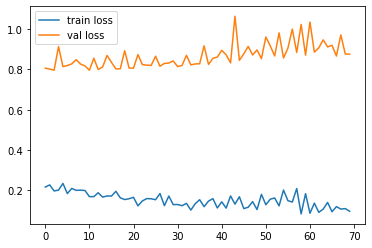

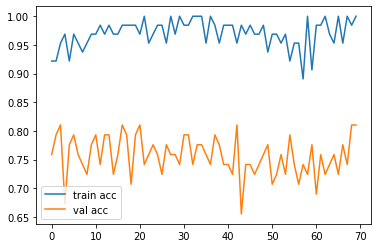

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [18]:
from tensorflow.keras.models import load_model

model.save("transfer_l_resnet.h5")

In [19]:
y_pred = model.predict(testing_set)

In [20]:
y_pred

array([[9.35704336e-02, 1.34918699e-02, 8.92937720e-01],
       [3.13923192e-05, 4.40797769e-03, 9.95560646e-01],
       [6.91042662e-01, 1.61709815e-01, 1.47247493e-01],
       [4.80857007e-02, 9.35837924e-01, 1.60763264e-02],
       [1.69811681e-01, 2.34864186e-02, 8.06701958e-01],
       [8.27990589e-05, 1.19343610e-03, 9.98723686e-01],
       [9.35305357e-01, 3.47926430e-02, 2.99019367e-02],
       [9.63161327e-03, 6.45391762e-01, 3.44976604e-01],
       [9.71483469e-01, 1.59479063e-02, 1.25686629e-02],
       [1.61344841e-01, 2.41068359e-02, 8.14548314e-01],
       [1.59182474e-02, 6.90138638e-02, 9.15067911e-01],
       [3.31945792e-02, 9.13096130e-01, 5.37093095e-02],
       [4.00085151e-01, 1.17389314e-01, 4.82525527e-01],
       [3.36219698e-01, 4.65477020e-01, 1.98303297e-01],
       [5.50562918e-01, 3.01885486e-01, 1.47551626e-01],
       [8.37543234e-03, 9.73341346e-01, 1.82831585e-02],
       [3.02481297e-02, 8.04956198e-01, 1.64795622e-01],
       [2.41281688e-01, 2.84734

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([2, 2, 0, 1, 2, 2, 0, 1, 0, 2, 2, 1, 2, 1, 0, 1, 1, 2, 1, 0, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 2, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1])

In [26]:
model = load_model("/content/transfer_l_resnet.h5")

In [36]:
img = image.load_img('/content/Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

In [37]:
x = image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [38]:
x.shape

(224, 224, 3)

In [39]:
x = x/225

In [40]:
x

array([[[1.12      , 1.12      , 1.12      ],
        [1.12      , 1.12      , 1.12      ],
        [1.12      , 1.12      , 1.12      ],
        ...,
        [0.8711111 , 0.83111113, 0.7644445 ],
        [0.96444446, 0.92444444, 0.8577778 ],
        [1.08      , 1.04      , 0.97333336]],

       [[1.12      , 1.12      , 1.12      ],
        [1.12      , 1.12      , 1.12      ],
        [1.12      , 1.12      , 1.12      ],
        ...,
        [1.0888889 , 1.0888889 , 1.0533333 ],
        [1.08      , 1.08      , 1.0444444 ],
        [1.0755556 , 1.0755556 , 1.04      ]],

       [[1.12      , 1.12      , 1.12      ],
        [1.12      , 1.12      , 1.12      ],
        [1.12      , 1.12      , 1.12      ],
        ...,
        [1.0666667 , 1.1066667 , 1.1022222 ],
        [1.0755556 , 1.1155555 , 1.1111112 ],
        [1.0755556 , 1.1155555 , 1.1111112 ]],

       ...,

       [[0.84      , 0.92      , 1.0177778 ],
        [0.84444445, 0.91555554, 1.0177778 ],
        [0.84444445, 0

In [41]:
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [42]:
model.predict(img_data)

array([[0.00299538, 0.01313259, 0.983872  ]], dtype=float32)

In [43]:
a = np.argmax(model.predict(img_data),axis=1)

In [44]:
a

array([2])